In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
with_mask_data = os.listdir('/content/drive/MyDrive/train/with_mask')
without_mask_data = os.listdir('/content/drive/MyDrive/train/without_mask')
print(f"Number of with mask image : {len(with_mask_data)}")
print(f"Number of without mask image : {len(without_mask_data)}")

Number of with mask image : 2279
Number of without mask image : 2664




1.   with mask =====> 1
2.   without mask ====> 0



In [5]:
with_mask_data =  [1]*len(with_mask_data)
without_mask_data = [0]*len(without_mask_data)

In [6]:
print(with_mask_data[0:10])
print(without_mask_data[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Converting Image in Numpy Array**



In [7]:
categories = ['with_mask','without_mask']

In [8]:
data = []

for c in categories:
    path = os.path.join('/content/drive/MyDrive/train',c)
    label = categories.index(c)
    for file in os.listdir(path):
        img_path = os.path.join(path,file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(128,128))
        img = np.array(img)
        data.append(img)

In [9]:
len(data)

4943

In [10]:
type(data[0])

numpy.ndarray

In [11]:
y = with_mask_data + without_mask_data

In [12]:
x = np.array(data)
y= np.array(y)

In [17]:
x.shape

(4943, 128, 128, 3)

In [13]:
y.shape

(4943,)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
x_train, x_test = x_train / 255, x_test / 255

In [16]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [19]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [20]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
124/124 [==============================] - 126s 997ms/step - loss: 0.5263 - acc: 0.7676
Epoch 2/5
124/124 [==============================] - 127s 1s/step - loss: 0.3112 - acc: 0.8784
Epoch 3/5
124/124 [==============================] - 124s 1s/step - loss: 0.2814 - acc: 0.8905
Epoch 4/5
124/124 [==============================] - 125s 1s/step - loss: 0.2291 - acc: 0.9082
Epoch 5/5
124/124 [==============================] - 124s 1s/step - loss: 0.1869 - acc: 0.9305


In [21]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss =' , np.round(loss,2))
print('Test Accuracy =' , np.round(accuracy,2))

31/31 [==============================] - 10s 310ms/step - loss: 0.3184 - acc: 0.8888
Test loss = 0.32
Test Accuracy = 0.89


Path of the image to be predicted: /content/iamge3.jpg


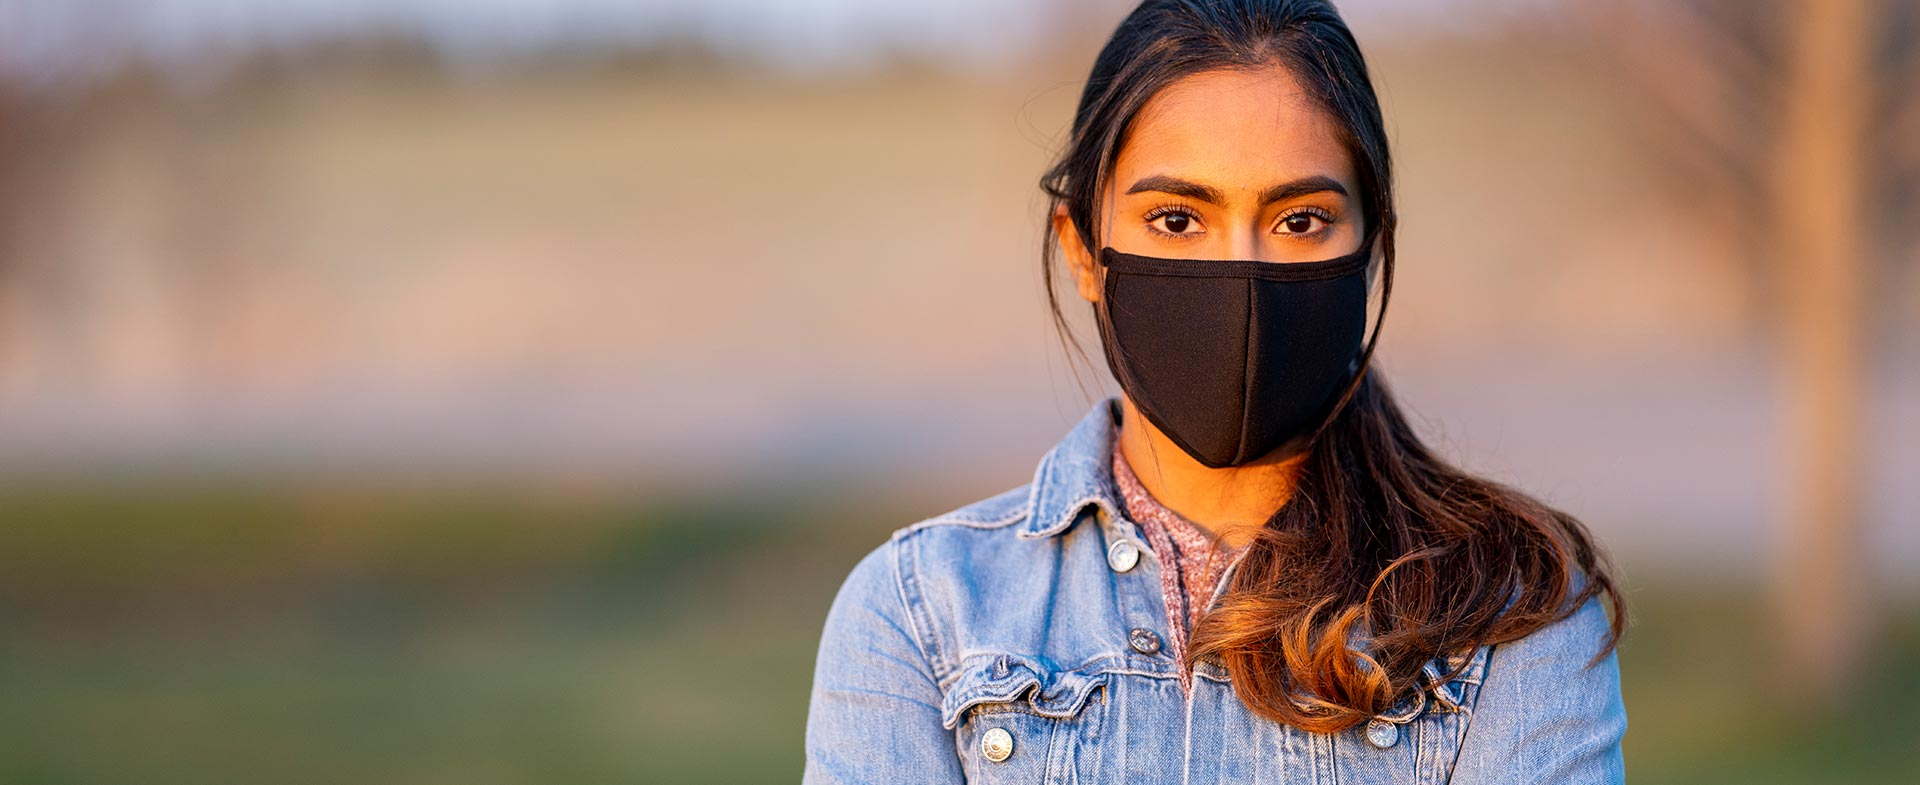

1/1 [==============================] - 0s 211ms/step
[[0.28040424 0.63940734]]
The person in the image is wearing a mask


In [22]:
image_path= input('Path of the image to be predicted: ')
read_image = cv2.imread(image_path)
cv2_imshow(read_image)
image_resized = cv2.resize(read_image, (128,128))
image_normal = image_resized/255
image_reshaped = np.reshape(image_normal, [1,128,128,3])
predection = model.predict(image_reshaped)
print(predection)
image_con_numpy = np.argmax(predection)
if image_con_numpy == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/image4.png


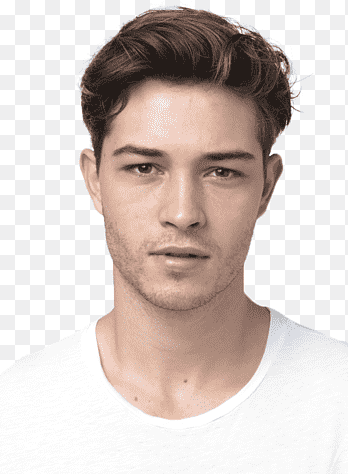

1/1 [==============================] - 0s 39ms/step
[[0.9205455  0.14921781]]
The person in the image is not wearing a mask


In [24]:
image_path= input('Path of the image to be predicted: ')
read_image = cv2.imread(image_path)
cv2_imshow(read_image)
image_resized = cv2.resize(read_image, (128,128))
image_normal = image_resized/255
image_reshaped = np.reshape(image_normal, [1,128,128,3])
predection = model.predict(image_reshaped)
print(predection)
image_con_numpy = np.argmax(predection)
if image_con_numpy == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/image5.jpeg


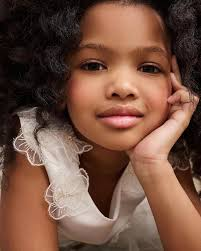

1/1 [==============================] - 0s 41ms/step
[[0.8778244  0.18982682]]
The person in the image is not wearing a mask


In [25]:
image_path= input('Path of the image to be predicted: ')
read_image = cv2.imread(image_path)
cv2_imshow(read_image)
image_resized = cv2.resize(read_image, (128,128))
image_normal = image_resized/255
image_reshaped = np.reshape(image_normal, [1,128,128,3])
predection = model.predict(image_reshaped)
print(predection)
image_con_numpy = np.argmax(predection)
if image_con_numpy == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/image1.jpg


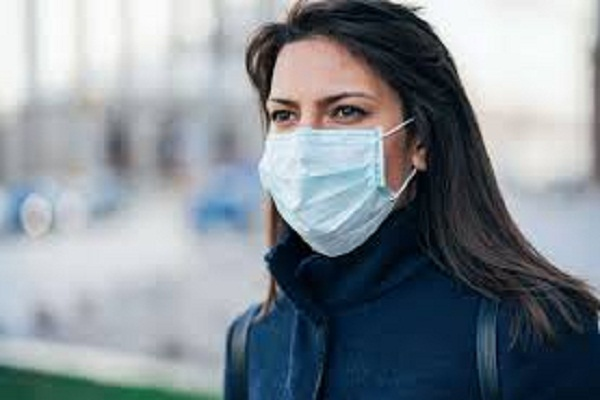

1/1 [==============================] - 0s 71ms/step
[[0.10657163 0.86018825]]
The person in the image is wearing a mask


In [28]:
image_path= input('Path of the image to be predicted: ')
read_image = cv2.imread(image_path)
cv2_imshow(read_image)
image_resized = cv2.resize(read_image, (128,128))
image_normal = image_resized/255
image_reshaped = np.reshape(image_normal, [1,128,128,3])
predection = model.predict(image_reshaped)
print(predection)
image_con_numpy = np.argmax(predection)
if image_con_numpy == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')